In [2]:
! curl -s "https://www.e-stat.go.jp/stat-search/file-download?statInfId=000031524010&fileKind=1" -o "人口.csv"
! pip install japanize_matplotlib

     |████████████████████████████████| 4.1 MB 14.4 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120274 sha256=1e67276f4f95124115728efef5d1ff5df308a6321137729ca39afbeb126b99a5
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
import numpy as np
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv("人口.csv", encoding="shift_jis")
df.head()

,都道府県コード,都道府県名,元号,和暦（年）,西暦（年）,注,人口（総数）,人口（男）,人口（女）
0,00,全国,大正,9.0,1920.0,NaN,55963053,28044185,27918868
1,01,北海道,大正,9.0,1920.0,NaN,2359183,1244322,1114861
2,02,青森県,大正,9.0,1920.0,NaN,756454,381293,375161
3,03,岩手県,大正,9.0,1920.0,NaN,845540,421069,424471
4,04,宮城県,大正,9.0,1920.0,NaN,961768,485309,476459


In [ ]:
df_2015 = df[df["西暦（年）"] == 2015]
df_2015 = df_2015.set_index("都道府県名").loc["北海道":]
df_2015

,都道府県コード,元号,和暦（年）,西暦（年）,注,人口（総数）,人口（男）,人口（女）
都道府県名,,,,,,,,
北海道,01,平成,27.0,2015.0,NaN,5381733,2537089,2844644
青森県,02,平成,27.0,2015.0,NaN,1308265,614694,693571
岩手県,03,平成,27.0,2015.0,NaN,1279594,615584,664010
宮城県,04,平成,27.0,2015.0,NaN,2333899,1140167,1193732
秋田県,05,平成,27.0,2015.0,NaN,1023119,480336,542783
山形県,06,平成,27.0,2015.0,NaN,1123891,540226,583665
福島県,07,平成,27.0,2015.0,NaN,1914039,945660,968379
茨城県,08,平成,27.0,2015.0,NaN,2916976,1453594,1463382
栃木県,09,平成,27.0,2015.0,NaN,1974255,981626,992629


# 2015年の都道府県別人口データを用いて、人口で非階層クラスタリングを実施せよ

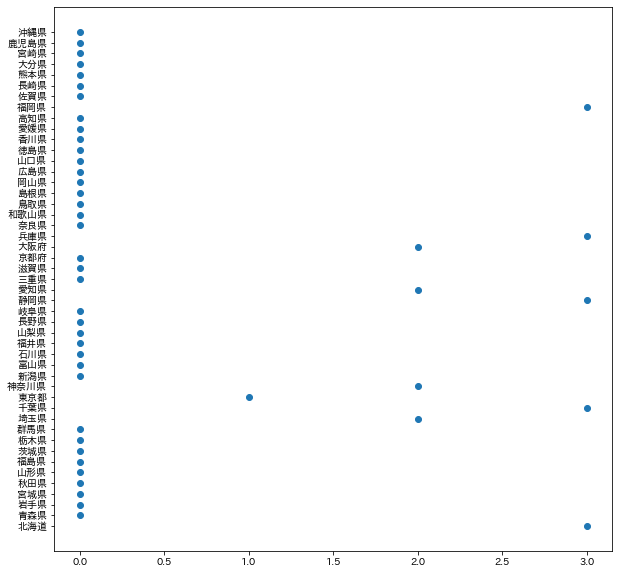

In [ ]:
##以下にコードを記載してください
##model名は「kmeans」で作成すること
#-------------------code--------------------#

x, y = df_2015["人口（総数）"], df_2015.index
x = np.array(x).reshape(-1,1)
y = np.array(y)
kmeans = KMeans(n_clusters=4, 
                    init='k-means++',
                    random_state=10)
kmeans.fit(x)
#-----------------//code--------------------#
##下記コードで結果を確認してください
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(kmeans.labels_, df_2015.index)